In [9]:
import qtm.qcompilation
import numpy as np
import types
%load_ext autoreload
%autoreload 2

In [19]:
num_qubits = 3
num_layers = 1

thetas = np.ones((2*num_qubits)*num_layers)
compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_polygongraph_ansatz,
    vdagger = qtm.state.create_AME_state_fake(num_qubits).inverse(),
    optimizer = 'adam',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
compiler.fit(num_steps = 100, verbose = 1)























Step:   0%|          | 0/100 [01:52<?, ?it/s]















































































Step: 100%|██████████| 100/100 [00:27<00:00,  3.58it/s]


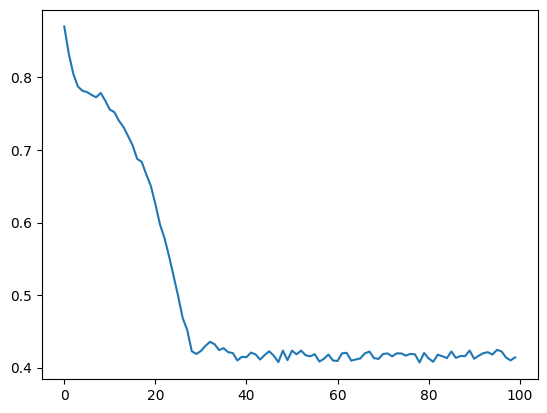

In [20]:
import matplotlib.pyplot as plt
plt.plot(compiler.loss_values)

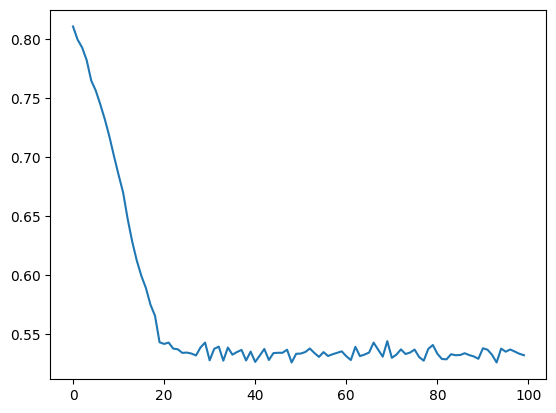

In [15]:
import matplotlib.pyplot as plt
plt.plot(compiler.loss_values)

In [21]:
np.min(compiler.loss_values)

0.4070626487409523

In [92]:
import qtm.qcompilation
import numpy as np
import types
num_qubits = 3


for optimizer in ['adam', 'qng_fubini_study', 'sgd']:
    for is_evo in [True, False]:
        for num_layers in [1,2]:

            thetas = np.ones(3*num_qubits*num_layers)
            compiler = qtm.qcompilation.QuantumCompilation(
                u = qtm.ansatz.create_hypergraph_ansatz,
                vdagger = qtm.state.create_AME_state(num_qubits).inverse(),
                optimizer = optimizer,
                loss_func = 'loss_fubini_study',
                thetas = thetas,
                is_evolutional=is_evo,
                num_layers = num_layers
            )
            compiler.fit(num_steps = 100, verbose = 1)
            if is_evo == False:
                compiler.save("", text = "", path = f"../experiments/hyper_graph_ame_{num_layers}_layer_{optimizer}/3/", save_all = True)
            else:
                compiler.save("", text = "", path = f"../experiments/hyper_graph_ame_{num_layers}_layer_{optimizer}_evo/3/", save_all = True)

Step: 100%|██████████| 100/100 [02:11<00:00,  1.32s/it]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/npyio.py:1533: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)
Step: 100%|██████████| 100/100 [02:35<00:00,  1.56s/it]


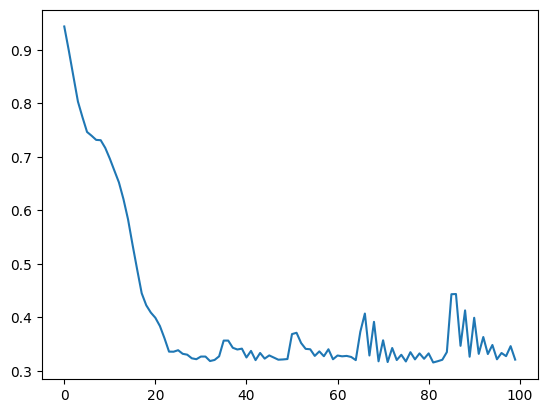

In [71]:
import matplotlib.pyplot as plt
plt.plot(compiler.loss_values)

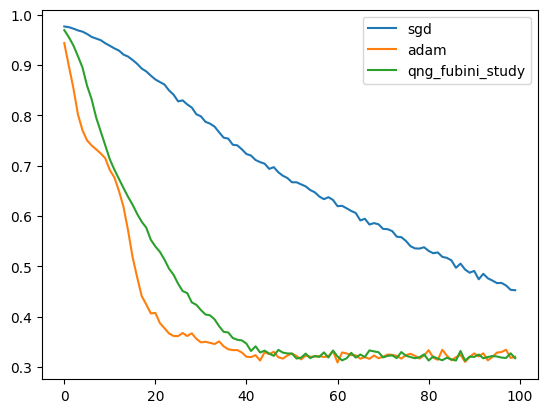

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
for optimizer in ['sgd', 'adam', 'qng_fubini_study']:
    loss = pd.read_csv(f"../experiments/hyper_graph_ame_1_layer_{optimizer}/3/loss_values.csv", sep=",", header=None)
    # loss_evo = pd.read_csv("../experiments/hyper_graph_ame_2_layer_adam_evo/3/loss_values.csv", sep=",", header=None)
    plt.plot(loss, label = optimizer)
plt.legend()